# SDSS classifier

The dataset has been downloaded from Sloan Digital Sky survey.
(https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey)

Column description

objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:
run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.


specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID



In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier

In [12]:
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [13]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [19]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

### Trying out color magnitude diagrames for star, galaxy and QSO

In [20]:
df['u-g'] = df['u']-df['g']

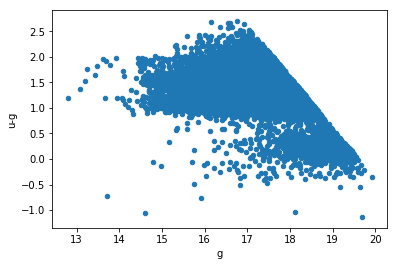

In [30]:
df.plot.scatter('g', 'u-g')

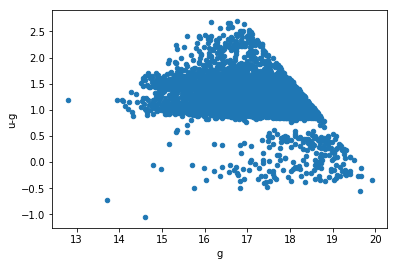

In [25]:
df[df['class'] == 'STAR'].plot.scatter('g', 'u-g')

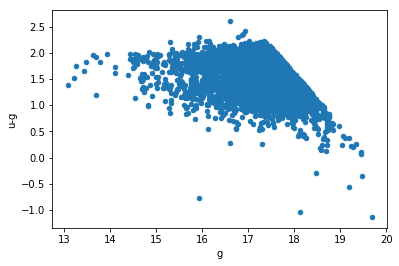

In [28]:
df[df['class'] == 'GALAXY'].plot.scatter('g', 'u-g')

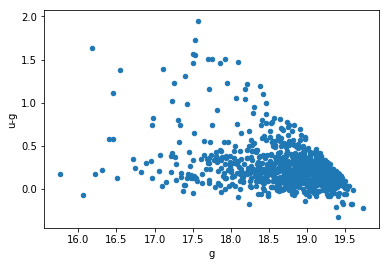

In [29]:
df[df['class'] == 'QSO'].plot.scatter('g', 'u-g')

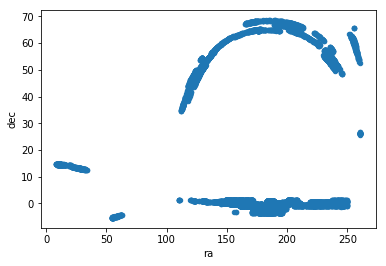

In [31]:
df.plot.scatter('ra', 'dec')

### Encoding training labels

In [34]:
df['class_enc'] = LabelEncoder().fit_transform(df['class'])

0 - GALAXY
1 - QSO
2 - STAR

### Splitting the dataframe into training features and labels

In [35]:
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
labels = ['class_enc', 'redshift']

In [36]:
X = df[features]
y = df[labels]

## splitting into train and test sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Predicting Classes

# Training and Validating models

### Support Vector Machine Classifier

In [46]:
SVC_mod = LinearSVC(verbose = 1)
SVC_mod.fit(X_train, y_train['class_enc'])

[LibLinear]

/Users/astrobalaji/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

In [48]:
SVC_mod.score(X_test, y_test['class_enc'])

0.8923333333333333

### Stochastic Gradient Descent Classifier

In [49]:
SGD_mod = SGDClassifier(verbose = 1)
SGD_mod.fit(X_train, y_train['class_enc'])

-- Epoch 1
Norm: 2090.43, NNZs: 7, Bias: 62.572293, T: 7000, Avg. loss: 26514.191997
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2105.67, NNZs: 7, Bias: 80.581053, T: 14000, Avg. loss: 7130.330909
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2042.64, NNZs: 7, Bias: 88.114831, T: 21000, Avg. loss: 4125.074631
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1960.80, NNZs: 7, Bias: 92.235715, T: 28000, Avg. loss: 2868.741164
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1868.29, NNZs: 7, Bias: 93.124365, T: 35000, Avg. loss: 2097.364329
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 1122.58, NNZs: 7, Bias: -150.292805, T: 7000, Avg. loss: 8474.868991
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1110.77, NNZs: 7, Bias: -192.623963, T: 14000, Avg. loss: 2406.274286
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1102.18, NNZs: 7, Bias: -214.609445, T: 21000, Avg. loss: 1392.221099
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1081.39, NNZs: 7, 

/Users/astrobalaji/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [50]:
SGD_mod.score(X_test, y_test['class_enc'])

0.6633333333333333

### Random forest classifier

In [59]:
RFC_mod = RandomForestClassifier(n_estimators=500)
RFC_mod.fit(X_train, y_train['class_enc'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
RFC_mod.score(X_test, y_test['class_enc'])

0.923

# Redshift prediction regressor

### Lasso regression

In [62]:
las_reg_mod = Lasso()
las_reg_mod.fit(X_train, y_train['redshift'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
las_reg_mod.score(X_test, y_test['redshift'])

-0.0004771623489421284